## Exercise 1
This dataset contains the chemical fingerprint of different samples of glass belonging to different classes.
The study of classification of types of glass was motivated by criminological investigation. At the scene of the
crime, the glass left can be used as evidence. If it is correctly identified!
Attribute Information:
• Id number: 1 to 214
• RI: refractive index
• Na: Sodium
• Mg: Magnesium
• Al: Aluminum
• Si: Silicon
• K: Potassium
• Ca: Calcium
• Ba: Barium
• Fe: Iron
• Type of glass: (class attribute)
    1. building windows float processed
    2. building windows non float processed
    3. vehicle windows float processed
    4. vehicle windows non float processed (none in this database)
    5. containers
    6. tableware
    7. headlamps
```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('glass.data', names=['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', \
'Ba', 'Fe','Type'])
data.head()
```
1. Extract the samples of type class 1 (building windows float processed) and 7 (headlamps). How many
samples belong to the two groups?
2. Normalize the data so that each feature has zero mean and unitary standard deviation.
3. Perform PCA on the dataset (do not consider the ”Id” as a feature!) by means of the SVD decomposition.
Then, plot the trend of the singular values $\sigma_k$, the cumulate fraction of singular values $\frac{\sum{\sigma_i}}{\sum{\sigma_i}}$, the fraction of the ”explained variance” $\frac{\sum{\sigma_i^2}}{\sum{\sigma_i^2}}$

4. Compute a matrix containing the principal components associated with the dataset.
5. Generate a scatterplot of the first two principal components of the dataset, grouped by label.
6. Consider now the first principle component. By looking at the components of the first principal direction,
do you expect building windows float processed glasses to have a large or small concentration of magnesium
and aluminium, respectively? And what about headlamps glasses

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('glass.csv', names=['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe','Type'])
data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


1. Extract the samples of type class 1 (building windows float processed) and 7 (headlamps). How many samples belong to the two groups?

In [2]:
data_1 = data[data['Type'] == 1]
print(len(data_1))
data_7 = data[data['Type'] == 7]
print(len(data_7))

X = pd.concat([data_1, data_7]).drop('Type', axis=1)

70
29


2. Normalize the data so that each feature has zero mean and unitary standard deviation.

In [3]:
# do not consider id as a feature
data_filtered = X.drop(columns=['Id'])

# calculate mean and standard deviation
data_mean = data_filtered.mean(axis=0)
data_std = data_filtered.std()
# normalize the dataset
data_normalized = (data_filtered - data_mean)/data_std

#visualize
data_normalized.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.126268,0.059169,1.200193,-0.628449,-1.322348,-0.870066,0.058524,-0.528456,-0.560214
1,-0.260656,0.378917,0.613448,-0.154488,0.013063,0.169214,-1.213640,-0.528456,-0.560214
2,-0.843980,-0.081519,0.580485,0.173638,0.378544,-0.053489,-1.282779,-0.528456,-0.560214
3,-0.240260,-0.490796,0.672782,-0.282093,-0.155620,0.391917,-0.674353,-0.528456,-0.560214
4,-0.338161,-0.414057,0.626633,-0.373240,0.505056,0.342428,-0.881771,-0.528456,-0.560214


3. Perform PCA on the dataset (do not consider the ”Id” as a feature!) by means of the SVD decomposition.
Then, plot the trend of the singular values $\sigma_k$, the cumulate fraction of singular values $\frac{\sum{\sigma_i}}{\sum{\sigma_i}}$, the fraction of the ”explained variance” $\frac{\sum{\sigma_i^2}}{\sum{\sigma_i^2}}$

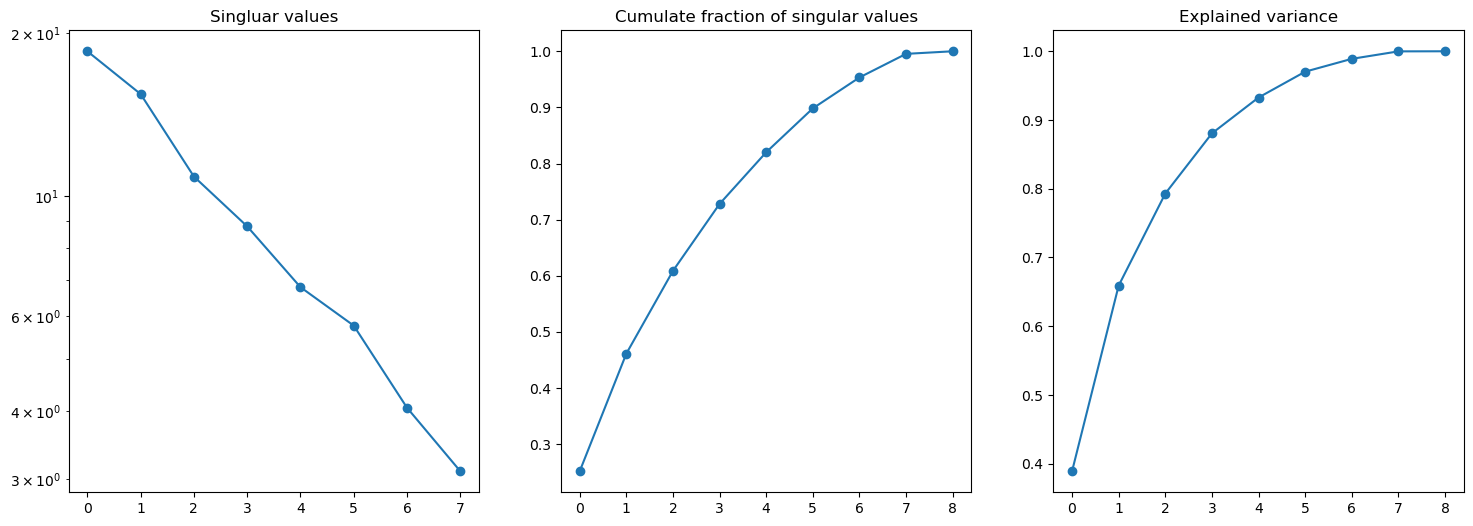

In [4]:
# convert pandas dataframe to numpy array
data_normalized_np = data_normalized.to_numpy()

# perform singular value decomposition
U, s, VT = np.linalg.svd(data_normalized_np, full_matrices=False)

# plot the cumulative fraction of the singular values and of the explained variance
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (18,6))

axes[0].semilogy(s[:-1], 'o-')
axes[0].set_title('Singluar values')

axes[1].plot(np.cumsum(s)/np.sum(s), 'o-')
axes[1].set_title('Cumulate fraction of singular values')

axes[2].plot(np.cumsum(s**2)/np.sum(s**2), 'o-')
axes[2].set_title('Explained variance')
plt.show()

4. Compute a matrix containing the principal components associated with the dataset.

In [5]:
# the matrix VT already contains the principal components direction
# Z contains the principal components with direction and respective weight
Z = np.dot(VT.T, np.diag(s))

5. Generate a scatterplot of the first two principal components of the dataset, grouped by label.

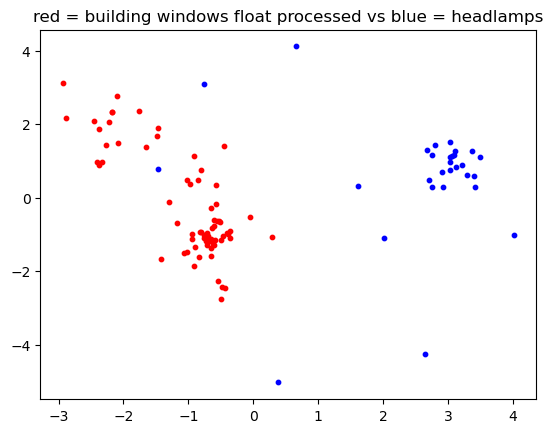

In [6]:
n_samples = len(data_normalized_np)
n_1 = len(data_1)
x = data_normalized_np @ VT[0,:].T
y = data_normalized_np @ VT[1, :].T

for i in range(n_samples):
    if i < n_1:
        col = 'red'
    else:
        col = 'blue'
    plt.scatter(x[i], y[i], marker='o', color=col, s=10)
plt.title('red = building windows float processed vs blue = headlamps')
plt.show()

6. Consider now the first principle component. By looking at the components of the first principal direction,
do you expect building windows float processed glasses to have a large or small concentration of magnesium
and aluminium, respectively? And what about headlamps glasses?

In [7]:
print(VT[0, 2:4])
print(VT[1, 2:4])

[-0.48557549  0.47511832]
[-0.12774655 -0.0088147 ]


1. Building windows float processed glasses (group red) have on average slightly negative values on both the first two principal components directions.
2. Headlamps glasses tends to have positive value in both principal direction, mainly on the first one.

3. Magnesium has a negative effect the positioning along both the first two components but mainly on the first one. We can say that high magnesium will lead the data in the third quadrant of the cartesian plane spanned by the first two principal directions.
4. Alluminium instead has a positive effect on the positioning along the first principal components and little to none effect on the second principal direction.


- From 1 and 3,4 we can say that the red group is likely to have an high concentration of Magnesium and a lower concentration of Alluminium.
- From 2 and 3,4 we can say that the blue group is likely to have an high concentration of Alluminium and a lower concentration of Magnesium.


7. Are your predictions confirmed by the original data?

In [8]:
print('Mg in building_windows_float_processed: ', data_1.mean()['Mg'])
print('Al in building_windows_float_processed: ', data_1.mean()['Al'])

print('Mg in headlamps: ', data_7.mean()['Mg'])
print('Al in headlamps: ', data_7.mean()['Al'])

print('Mg mean: ', data_mean['Mg'])
print('Al mean: ', data_mean['Al'])

Mg in building_windows_float_processed:  3.552428571428572
Al in building_windows_float_processed:  1.1638571428571431
Mg in headlamps:  0.5382758620689655
Al in headlamps:  2.1227586206896554
Mg mean:  2.669494949494949
Al mean:  1.4447474747474751


The hypotesis are actually verified by data expecially when we consider the alluminium and magnesium precence with respect to their average value.

## Exercise 2
Consider the following function (where x = (x, y)):

$$f(x) = (x + 2y − 7)^2 + (2x + y − 5)^2 $$  (1)
1. Plot the function.
2. Compute analitically the value xmin where the function attains its minimum value and f (xmin ).
3. Implement the gradient descent (GD) method <br>
    $$x^{k+1} = x^{k} − \alpha∇f (x^{k})$$ (2) <br>
    where α is the learning rate. Use the stopping criterium E < ϵ where E is the absolute value of the
    difference of the last two functional values i.e. <br>
    $$E = |f (x^{k+1} ) − f (x^k )|$$ (3) <br>
    and ϵ is the required tolerance. Moreover set the maximum number of iterations to 200.

4. Apply the GD method with ϵ = 10−3 , α = 0.01 and 0.1. Plot the convergence history and comment the
results.
5. Implement the GD with momentum (GDM) i.e. <br>
$$z^{k+1} = βz^k + ∇f (x^k )$$  (4) <br>
$$x^{k+1} = x^k − αz^{k+1}$$  (5) <br>
where α is the learning rate and β is the momentum coefficient. Use the same stopping criterium used in
the GD method.
6. Apply the GDM method with ϵ = 10−3 , α = 0.01, 0.1 and β = 0.5, 0.9. Plot the convergence history and
comment the results.

1. Plot the function.

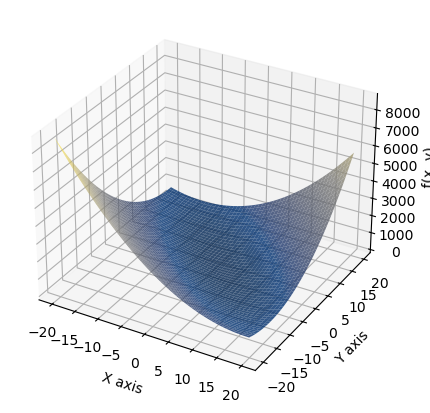

In [9]:
def f(X):
    x = X[0]
    y = X[1]
    return (x + 2*y -7)**2 + (2*x+y-5)**2

x0 = np.arange(-20,20, 0.1)
y0 = np.arange(-20,20, 0.1) 
X, Y = np.meshgrid(x0, y0)

Z = f([X, Y])

fig = plt.figure(figsize=(5,5))

axs = fig.add_subplot(1, 1, 1, projection='3d')
axs.plot_surface(X, Y, Z, cmap = plt.cm.cividis, alpha=0.8)
axs.set_xlabel('X axis')
axs.set_ylabel('Y axis')
axs.set_zlabel('f(x, y)')
plt.show()

2. Compute analitically the value xmin where the function attains its minimum value and f (xmin ).

In [10]:
# Noted that f is a quadratic function and from the previous visualization we know that it is convex, we know that:
# - the function will have a single stationary point that is it's minima. 
# - the stationary point can be found by solving the equation grad(f) = (0,0)

import jax
import jax.numpy as jnp
import sympy as sym

sx = sym.Symbol('sx')
sy = sym.Symbol('sy')
sf = (sx + 2*sy -7)**2 + (2*sx+sy-5)**2
sgrad = sym.Matrix([[sym.diff(sf, sx), sym.diff(sf, sy)]])
s0 = sym.Matrix([0, 0])
x1 = sym.solve(sgrad[0], sx, 0, dict=True)
x2 = sym.solve(sgrad[1], sx, 0, dict=True)

ymin = sym.solve(x1[0][sx] - x2[0][sx], sy, 0, dict=True)[0][sy]
xmin = x1[0][sx].subs('sy',ymin)

print(sgrad.subs('sx',xmin).subs('sy',ymin) == sym.Matrix([[0,0]]))

True


In [11]:
fmin = f([xmin,ymin])
Xmin = [xmin,ymin]
print('Minimum is in:', Xmin, ' with value:', fmin)

Minimum is in: [1, 3]  with value: 0


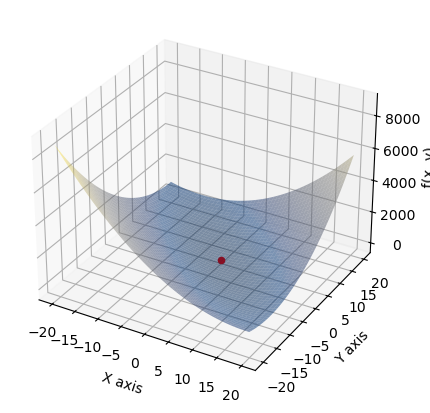

In [12]:
fig = plt.figure(figsize=(5,5))

axs = fig.add_subplot(1, 1, 1, projection='3d')
axs.plot_surface(X, Y, Z, cmap = plt.cm.cividis, alpha=0.5)
axs.set_xlabel('X axis')
axs.set_ylabel('Y axis')
axs.set_zlabel('f(x, y)')
axs.scatter(xmin, ymin, fmin, color='red')
plt.show()

3. Implement the gradient descent (GD) method <br>
    $$x^{k+1} = x^{k} − \alpha∇f (x^{k})$$ (2) <br>
    where α is the learning rate. Use the stopping criterium E < ϵ where E is the absolute value of the
    difference of the last two functional values i.e. <br>
    $$E = |f (x^{k+1} ) − f (x^k )|$$ (3) <br>
    and ϵ is the required tolerance. Moreover set the maximum number of iterations to 200.


In [13]:
def GD(X, f, alpha, epsilon, maximum_iterations=200):
    grad = jax.jit(jax.grad(f, argnums=0))
    Xi = X
    history = [[Xi[0], Xi[1], f(Xi)]]
    for i in range(maximum_iterations):
        Xprev = Xi
        Xi = Xi - alpha*np.array(grad(Xi))
        E = np.abs(f(Xi)-f(Xprev))
        history.append([Xi[0], Xi[1], f(Xi)])
        if E < epsilon:
            break
    return np.array(history)

4. Apply the GD method with ϵ = 10−3 , α = 0.01 and 0.1. Plot the convergence history and comment the
results.

  0%|          | 0/2 [00:00<?, ?it/s]

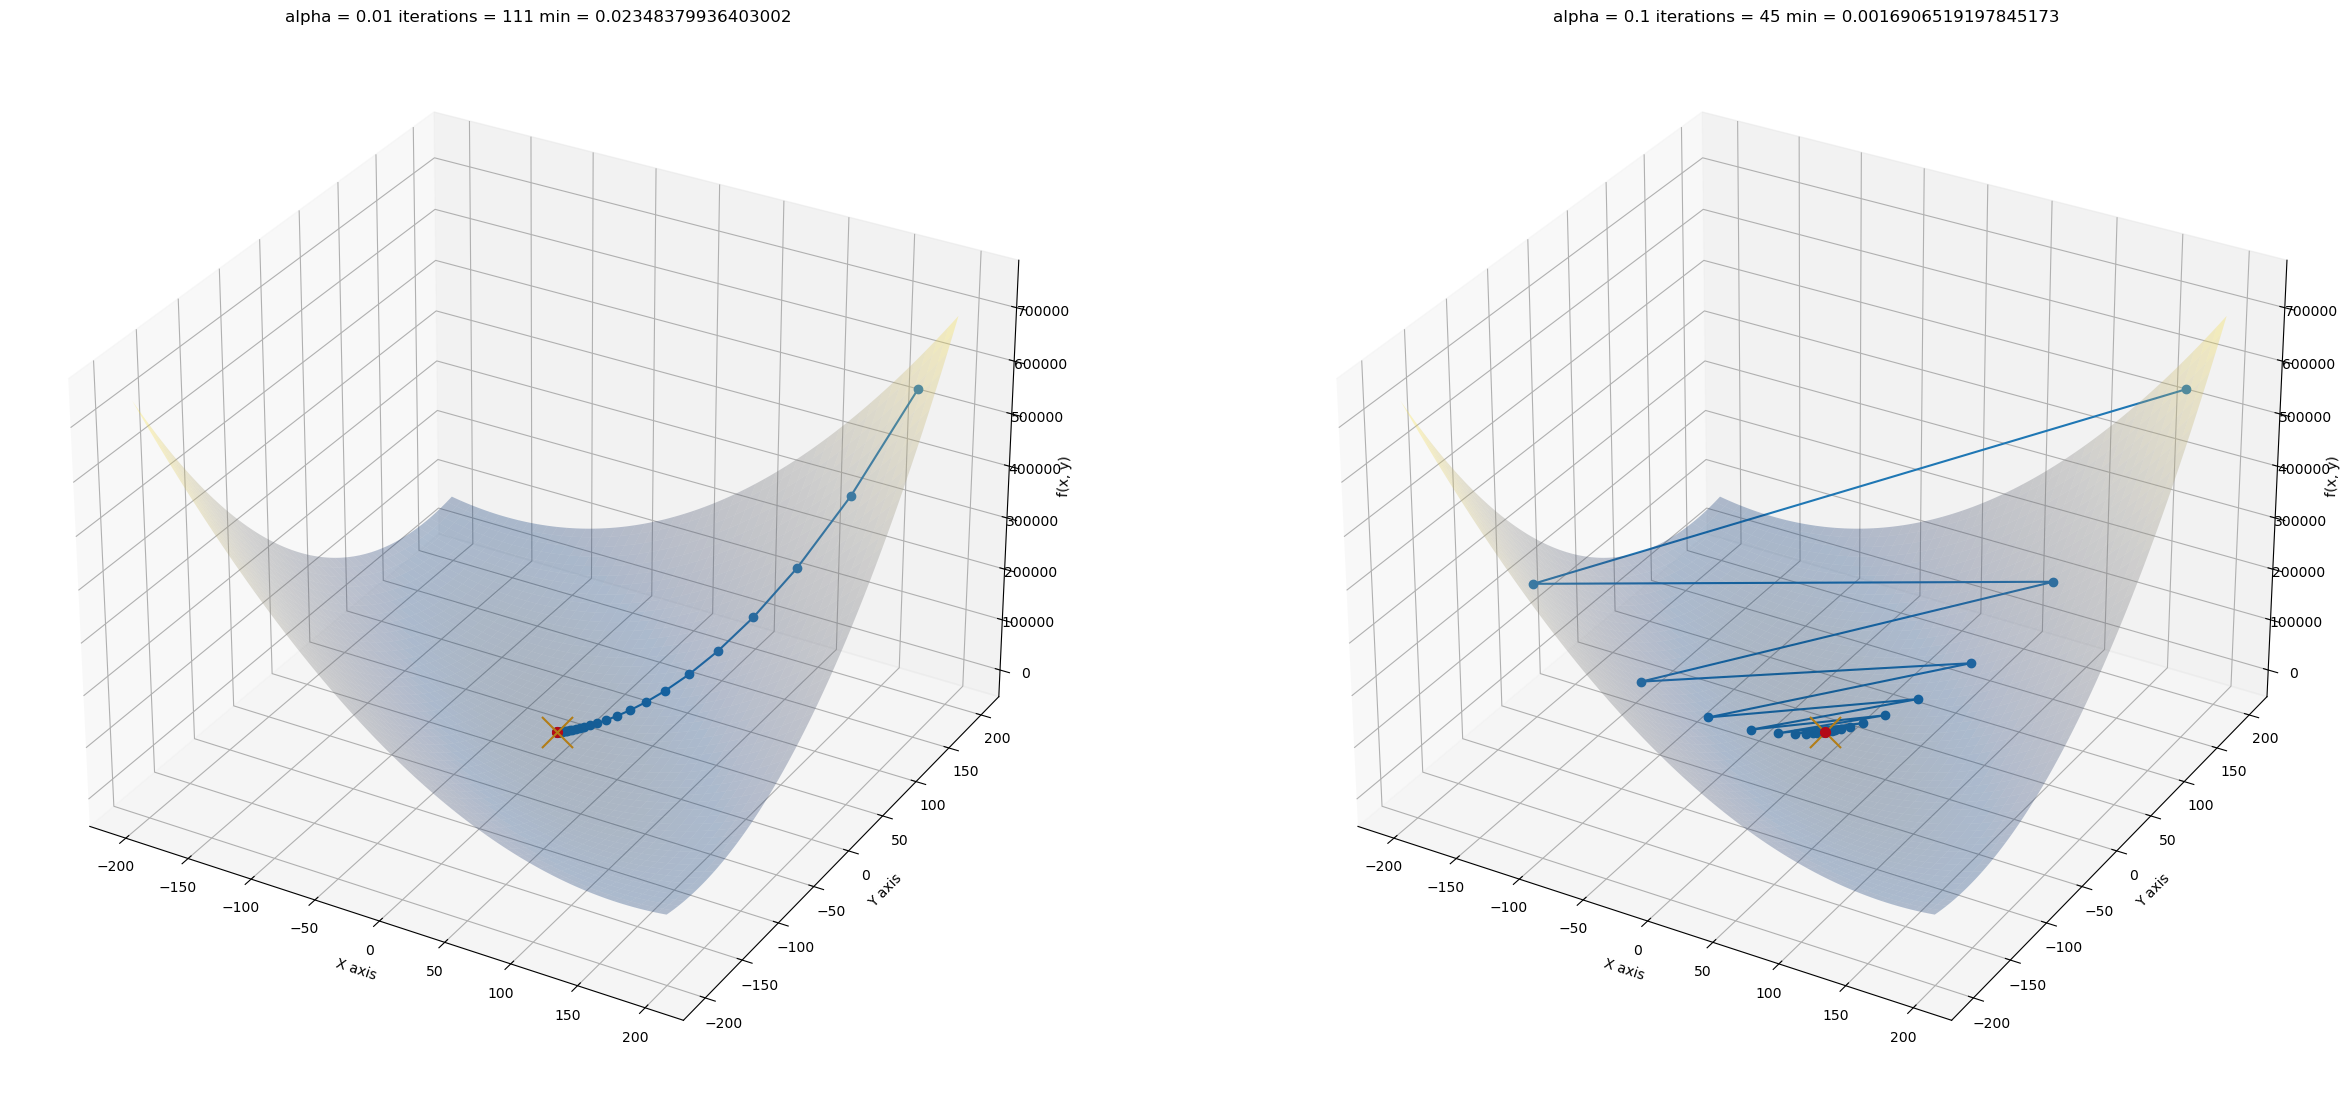

In [14]:
from tqdm.notebook import tqdm

epsilon = 1e-3
alpha = [1e-2, 1e-1]

x0 = np.arange(-200,200, 1)
y0 = np.arange(-200,200, 1) 
X, Y = np.meshgrid(x0, y0)

X, Y = np.meshgrid(x0, y0)
Z = f([X, Y])

fig = plt.figure(figsize=(30,30))


for i in tqdm(range(len(alpha))):
    history = GD([180.,180.], f, alpha[i], epsilon)

    axs = fig.add_subplot(1, len(alpha), i+1, projection='3d')
    axs.plot_surface(X, Y, Z, cmap = plt.cm.cividis, alpha=0.3)
    axs.set_xlabel('X axis')
    axs.set_ylabel('Y axis')
    axs.set_zlabel('f(x, y)')
    axs.plot(history[:,0], history[:,1], history[:,2], 'o-')
    axs.scatter(xmin, ymin, fmin, color='red', s=50)
    axs.scatter(history[-1,0], history[-1,1], history[-1,2], marker='x', color='orange', s=500)
    axs.set_title(f'alpha = {alpha[i]} iterations = {len(history)} min = {f(history[-1,0:2])}')

plt.show()


### Comment:

When alpha is smaller we have a smooter convergence meanwhile when alpha is larger the convergence is less smooth but proved to be faster in this particular case. This means that likely the best learning rate is between the two, because 0.1 is too large causing jumps and 0.01 is too slow.
Given that the function is:
- Lipschitz continuous with constan L meaning that:  $∥∇f(x)−∇f(y)∥≤L∥x−y∥ $
- Strongly convex with parameter $\mu$ meaning that: $f(y)≥f(x)+∇f(x)^T(y−x)+\frac{μ}{2}∥y−x∥^2$

Note that Lipschitz continuity is equivalent to smooth convexity. Note that L = $\mu$.
Given these properties we can actually compute the best learning rate as follows.

In [15]:
hf = sym.hessian(sf, [sx, sy])

max = None
for el in hf.eigenvals():
    if not max or el > max:
        max = el
best_alpha = 1/max
print(best_alpha)

1/18


In particular using this learning rate we would have converged in 28 iterations

5. Implement the GD with momentum (GDM) i.e. <br>
$$z^{k+1} = βz^k + ∇f (x^k )$$ <br>
$$x^{k+1} = x^k − αz^{k+1}$$  <br>
where α is the learning rate and β is the momentum coefficient. Use the same stopping criterium used in
the GD method.

In [16]:
def GDM(X, f, alpha, beta, epsilon, maximum_iterations=200):
    grad = jax.jit(jax.grad(f, argnums=0))
    Zi = np.zeros(len(X))
    Xi = np.array(X)
    history = [[Xi[0], Xi[1], f(Xi)]]
    
    for i in range(maximum_iterations):
        Xprev = Xi
        Zi = beta*Zi + np.array(grad(Xi))
        Xi = Xi - alpha*Zi
        
        E = np.abs(f(Xi)-f(Xprev))
        history.append([Xi[0], Xi[1], f(Xi)])
        if E < epsilon:
            break
    return np.array(history)

6. Apply the GDM method with ϵ = 10−3 , α = 0.01, 0.1 and β = 0.5, 0.9. Plot the convergence history and
comment the results.

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

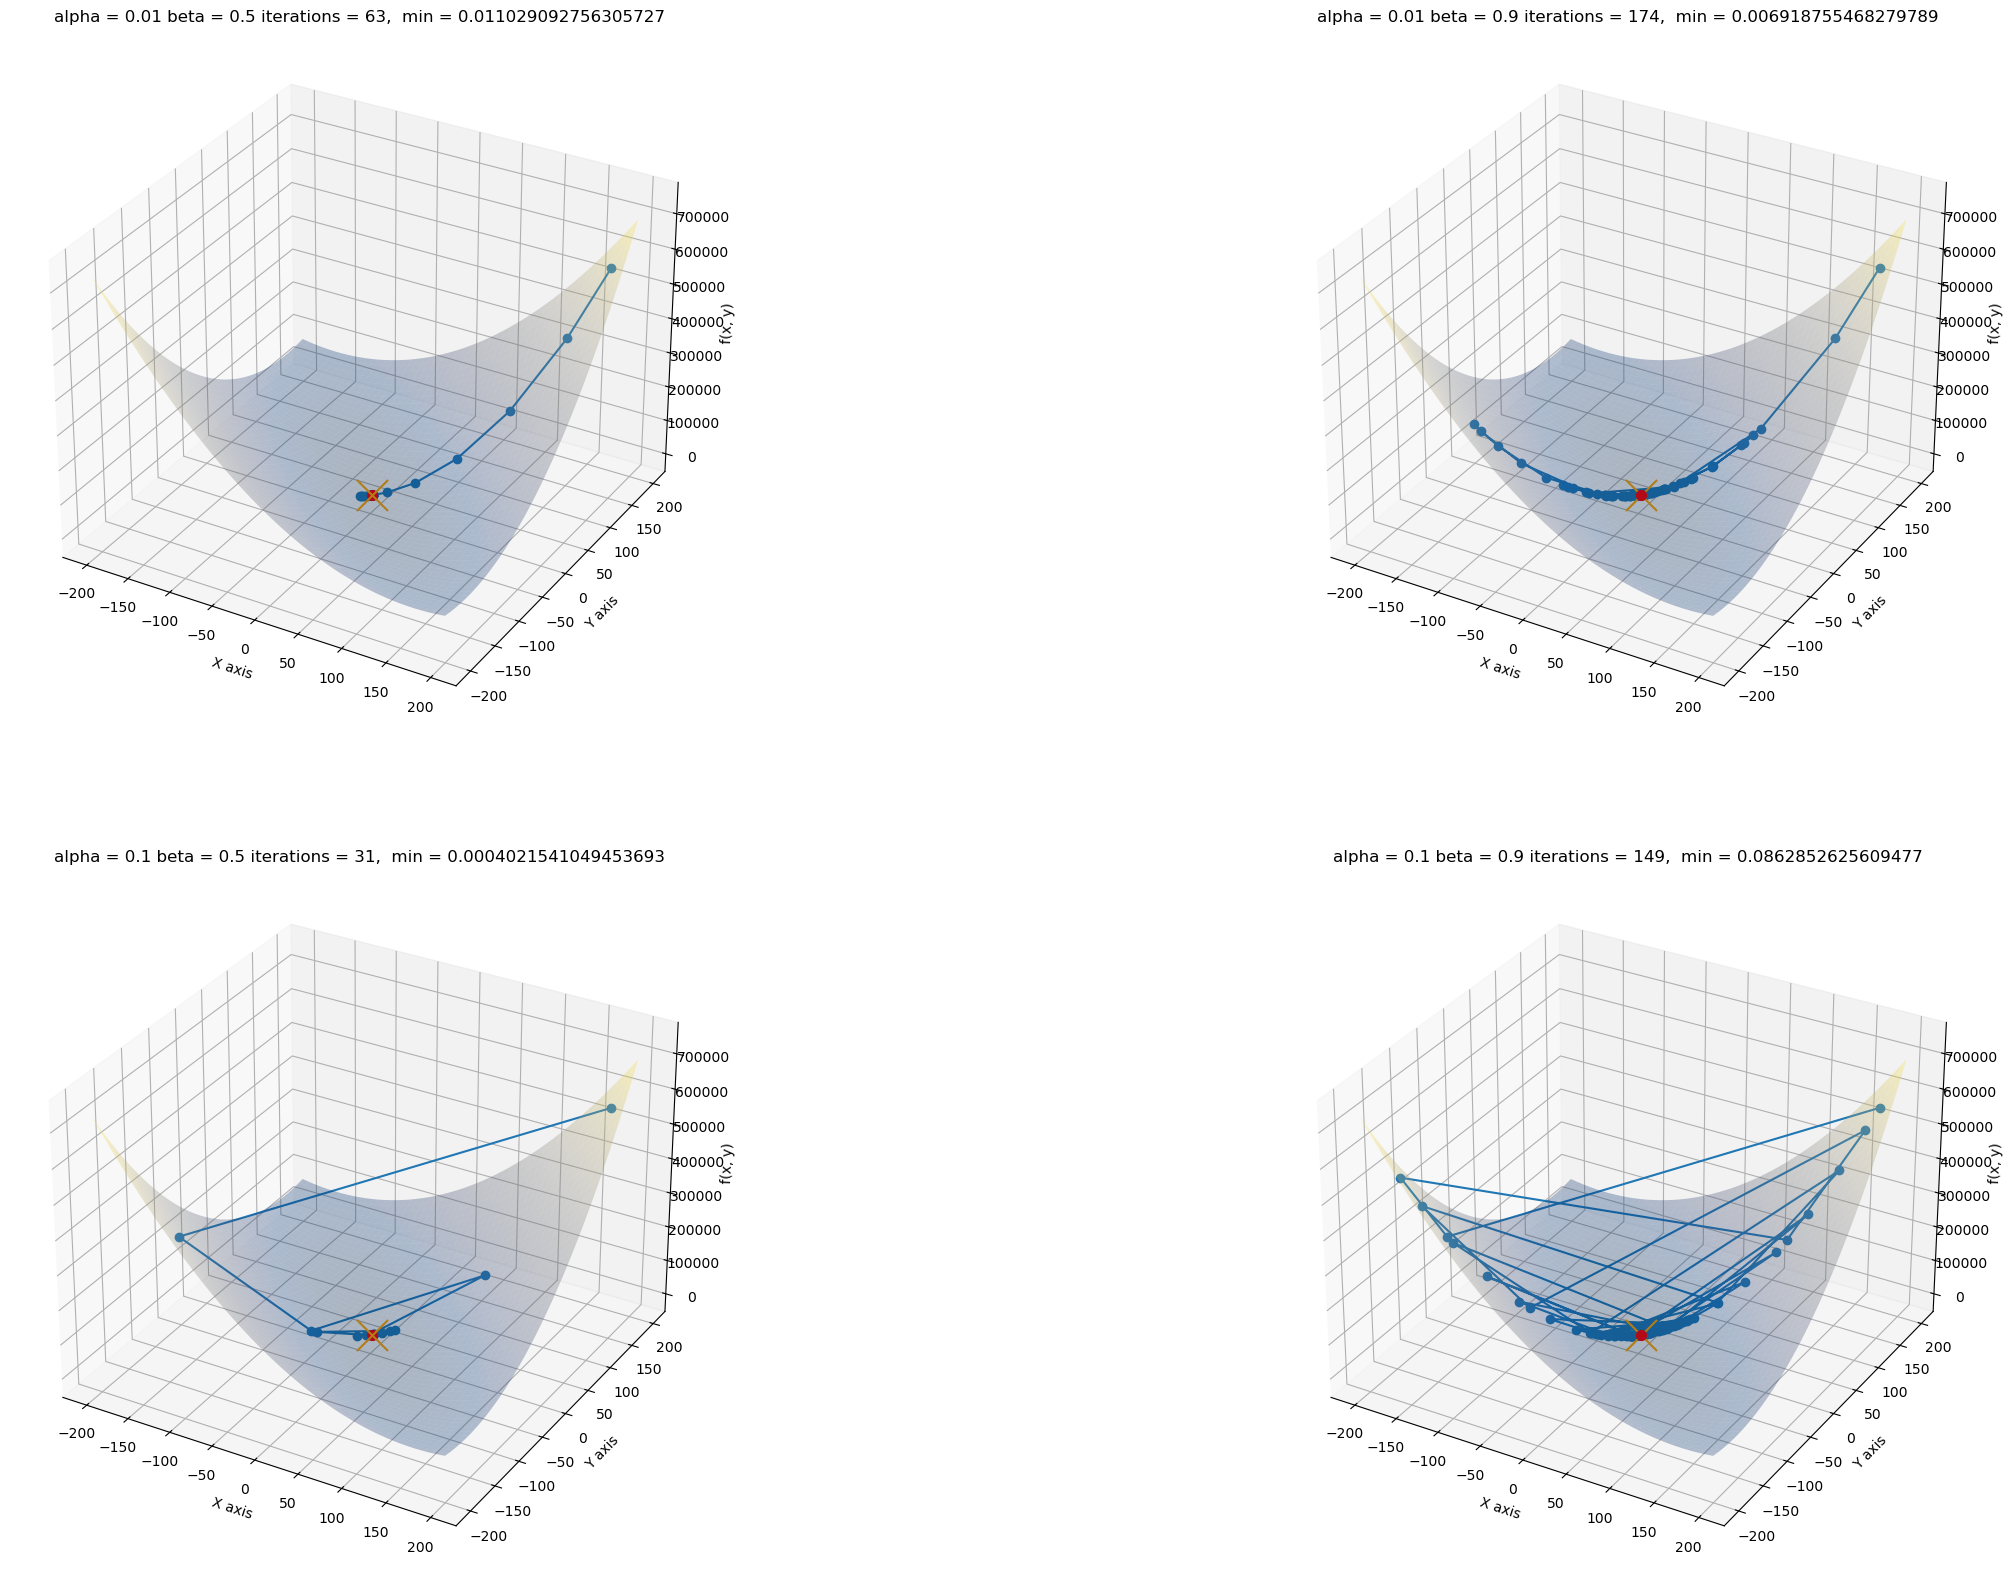

In [17]:
from tqdm.notebook import tqdm

epsilon = 1e-3
alpha = [1e-2, 1e-1]
beta = [0.5, 0.9]

x0 = np.arange(-200,200, 1)
y0 = np.arange(-200,200, 1) 
X, Y = np.meshgrid(x0, y0)

X, Y = np.meshgrid(x0, y0)
Z = f([X, Y])

fig = plt.figure(figsize=(30,20))


for i in range(len(alpha)):
    for j in tqdm(range(len(beta))):
        history = GDM([180.,180.], f, alpha[i], beta[j], epsilon)

        axs = fig.add_subplot(len(alpha), len(beta), len(beta)*i + j+1, projection='3d')
        axs.plot_surface(X, Y, Z, cmap = plt.cm.cividis, alpha=0.3)
        axs.set_xlabel('X axis')
        axs.set_ylabel('Y axis')
        axs.set_zlabel('f(x, y)')
        axs.plot(history[:,0], history[:,1], history[:,2], 'o-')
        axs.scatter(xmin, ymin, fmin, color='red', s=50)
        axs.scatter(history[-1,0], history[-1,1], history[-1,2], marker='x', color='orange', s=500)
        axs.set_title(f'alpha = {alpha[i]} beta = {beta[j]} iterations = {len(history)},  min = {f(history[-1,0:2])}')
plt.show()

## Exercise 3

Consider the two classes of patterns that are shown in the following figure where Class I represents vertical
lines and Class II represents horizontal lines.
 <p style="text-align: center;">
    ![Alt text](./img.png)
 </p>
1. Are these categories linearly separable ?
2. Design a multilayer network to distinguish these categories.

1. Are these categories linearly separable ?

> No, they are not linearly separable, proving it is not so easy because visualizing data in 4D is not easy.
> Other method are possible such as solving a linear optimization problem. In particular the following the following optimization problem gaves 0 as the best result if and only if the classes are linearly separable

In [18]:
import mip

m = mip.Model()

C1 = ([1,0,1,0], [0,1,0,1])
C2 = ([1,1,0,0], [0,0,1,1])
a = {i: m.add_var() for i in range(4)} #empty variables
b = m.add_var()
y = {i: m.add_var() for i in range(len(C1))}
z = {i: m.add_var() for i in range(len(C2))}

for i in range(len(C1)):
    m.add_constr(y[i] + a[0]*C1[i][0] + a[1]*C1[i][1] + a[2]*C1[i][2] + a[3]*C1[i][3] - b >= 1 )
    m.add_constr(y[i]>=0)

for i in range(len(C1)):
    m.add_constr(z[i] - a[0]*C2[i][0] - a[1]*C2[i][1] - a[2]*C2[i][2] - a[3]*C2[i][3] + b >= 1 )
    m.add_constr(z[i]>=0)

m.objective = mip.minimize((1/len(C1))*mip.xsum(y[i] for i in range(len(C1))) + (1/len(C2))*mip.xsum(z[i] for i in range(len(C2))))

r = m.optimize()
print('>>> The categories are linearly separable: ', m.objective_value == 0)

Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Oct 24 2021 

Starting solution of the Linear programming problem using Dual Simplex

>>> The categories are linearly separable:  False


2. Design a multilayer network to distinguish these categories.

Here is a schema of the network, note that each neuron has an activation function such that:

$$a(x)=1\ if\ x>0,\ a(x)=0 \ otherwise$$

![Alt text](./img1.png)


In [19]:
def a(x):
    for i in range(len(x)):
        if x[i] > 0:
            x[i] = 1
        else:
            x[i] = 0
    return x

def NN(x):
    x = np.array(x)
    w_01 = [1, 0, 1, 0]
    w_02 = [0, 1, 0, 1]
    b_01 = -1
    b_02 = -1
    w_1 = [2, 2]
    b_1 = -1
    
    o_0 = np.array([w_01 @ x.T + b_01, w_02 @ x.T + b_02])
    o_1 = np.array(w_1@a(o_0).T + b_1)
    if o_1 > 0:
        return 'Class 1'
    return 'Class 2'
def test():    
    C1 = ([1,0,1,0], [0,1,0,1])
    C2 = ([1,1,0,0], [0,0,1,1])
    for el in C1:
        if NN(el)!='Class 1':
            return False
    for el in C2:
        if NN(el)!='Class 2':
            return False   
    return True

test()

True